Importing the Data Set

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importing required liabraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec

In [ ]:
path = "/content/drive/MyDrive/Colab_Notebooks/Fraud.csv"
df_bonus = pd.read_csv(path)

In [ ]:
df = df_bonus.copy()

In [ ]:
df.head(20)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [ ]:
print(df.describe())

               step        amount  oldbalanceOrg  newbalanceOrig  \
count  6.362620e+06  6.362620e+06   6.362620e+06    6.362620e+06   
mean   2.433972e+02  1.798619e+05   8.338831e+05    8.551137e+05   
std    1.423320e+02  6.038582e+05   2.888243e+06    2.924049e+06   
min    1.000000e+00  0.000000e+00   0.000000e+00    0.000000e+00   
25%    1.560000e+02  1.338957e+04   0.000000e+00    0.000000e+00   
50%    2.390000e+02  7.487194e+04   1.420800e+04    0.000000e+00   
75%    3.350000e+02  2.087215e+05   1.073152e+05    1.442584e+05   
max    7.430000e+02  9.244552e+07   5.958504e+07    4.958504e+07   

       oldbalanceDest  newbalanceDest       isFraud  isFlaggedFraud  
count    6.362620e+06    6.362620e+06  6.362620e+06    6.362620e+06  
mean     1.100702e+06    1.224996e+06  1.290820e-03    2.514687e-06  
std      3.399180e+06    3.674129e+06  3.590480e-02    1.585775e-03  
min      0.000000e+00    0.000000e+00  0.000000e+00    0.000000e+00  
25%      0.000000e+00    0.000000e+00

Checking for any null values and removing it .

In [ ]:
null = df.isnull().sum()
print(null)

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


In [ ]:
print(df.isna()
)

          step   type  amount  nameOrig  oldbalanceOrg  newbalanceOrig  \
0        False  False   False     False          False           False   
1        False  False   False     False          False           False   
2        False  False   False     False          False           False   
3        False  False   False     False          False           False   
4        False  False   False     False          False           False   
...        ...    ...     ...       ...            ...             ...   
6362615  False  False   False     False          False           False   
6362616  False  False   False     False          False           False   
6362617  False  False   False     False          False           False   
6362618  False  False   False     False          False           False   
6362619  False  False   False     False          False           False   

         nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0           False           False 

In [ ]:
df.dropna(inplace=True)
print(df.shape)


(6362620, 11)


In [ ]:
trn = df['type'].value_counts()
typ = trn.index
num = trn.values

Graphical Representation

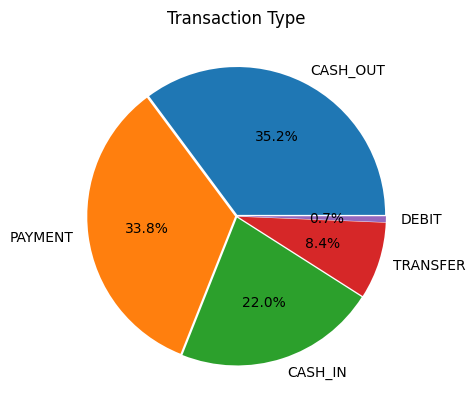

In [ ]:
ex = (0.01,0.01,0.01,0.01,0.01)
plt.pie(num, labels=typ, autopct='%1.1f%%', explode= ex)
plt.title('Transaction Type')
plt.show()

In [ ]:
fraud_cnt = df['isFraud'].value_counts()
print(fraud_cnt)
#it seems that only 8213 out of 6362620 transaction is fraud

isFraud
0    6354407
1       8213
Name: count, dtype: int64


In [ ]:
fraud_typ = fraud_cnt.index
fraud_num = fraud_cnt.values

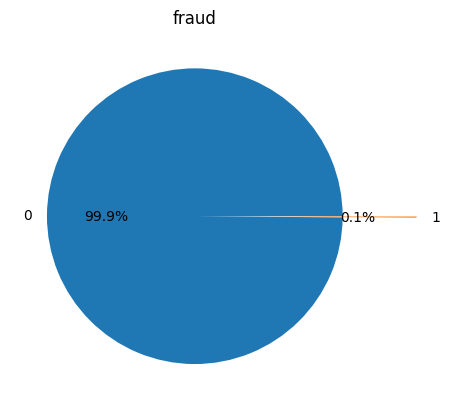

In [ ]:
exp = (0,0.5)
plt.pie(fraud_num,labels=fraud_typ,autopct='%1.1f%%',explode=exp)
plt.title('fraud')
plt.show()

In [ ]:
df['isFlaggedFraud'].value_counts()

,count
isFlaggedFraud,
0,6362604
1,16


Encoding the type of transaction into numerical

In [ ]:
df['type'] = df['type'].map({"CASH_OUT":1,"PAYMENT":2,"CASH_IN":3,"TRANSFER":4,"DEBIT":5})
df['isFraud'] =df['isFraud'].map({0:"nofraud", 1:"fraud"})
print(df.head(20))

    step  type     amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0      1     2    9839.64  C1231006815      170136.00       160296.36   
1      1     2    1864.28  C1666544295       21249.00        19384.72   
2      1     4     181.00  C1305486145         181.00            0.00   
3      1     1     181.00   C840083671         181.00            0.00   
4      1     2   11668.14  C2048537720       41554.00        29885.86   
5      1     2    7817.71    C90045638       53860.00        46042.29   
6      1     2    7107.77   C154988899      183195.00       176087.23   
7      1     2    7861.64  C1912850431      176087.23       168225.59   
8      1     2    4024.36  C1265012928        2671.00            0.00   
9      1     5    5337.77   C712410124       41720.00        36382.23   
10     1     5    9644.94  C1900366749        4465.00            0.00   
11     1     2    3099.97   C249177573       20771.00        17671.03   
12     1     2    2560.74  C1648232591        5070.

In [ ]:
df_new = df.drop(['nameOrig','nameDest','isFlaggedFraud'],axis=1)
df_new['isFraud'] = df_new['isFraud'].map({"nofraud":0,"fraud":1})
df_newx = df.drop(['nameOrig','nameDest','isFlaggedFraud','isFraud'],axis=1)

Plotting correlation matrix to check multicollineearity

<Axes: >

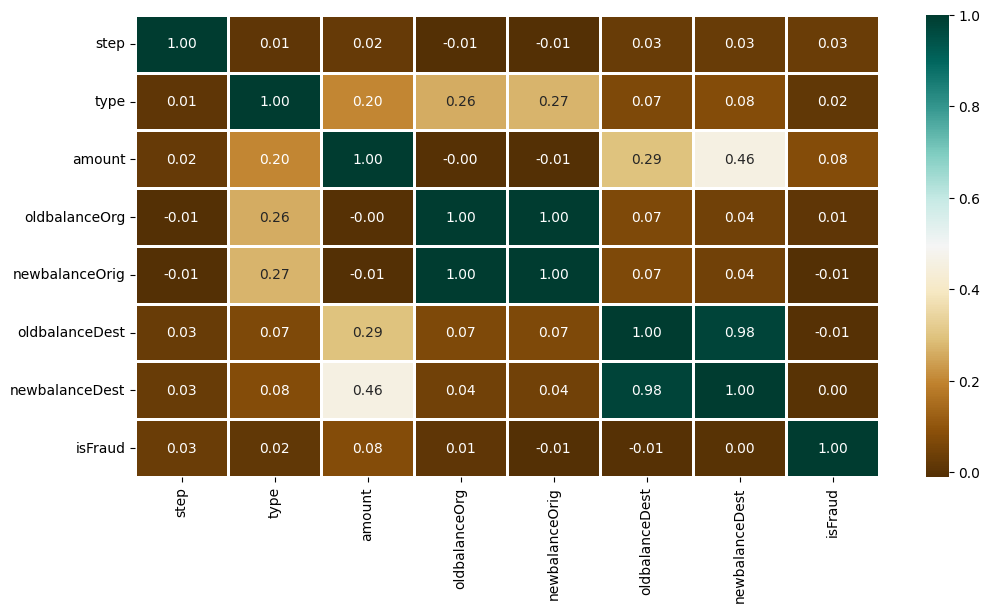

In [ ]:
plt.figure(figsize=(12, 6))
sns.heatmap(df_new.corr(),
			cmap='BrBG',
			fmt='.2f',
			linewidths=2,
			annot=True)


In [ ]:
fraud = df_new[df_new['isFraud'] == 1]
valid = df_new[df_new['isFraud'] == 0]

VIF


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(df_newx):
  vif = pd.DataFrame()
  vif["variables"] = df_newx.columns
  vif["VIF"] = [variance_inflation_factor(df_newx.values, i) for i in range(df_newx.shape[1])]
  return(vif)
calc_vif(df_newx)

,variables,VIF
0,step,2.639412
1,type,3.153339
2,amount,4.193895
3,oldbalanceOrg,482.539694
4,newbalanceOrig,487.015338
5,oldbalanceDest,72.499481
6,newbalanceDest,84.002774


In [ ]:
df_newx['Amt_orgn'] = df_newx.apply(lambda x : x['oldbalanceOrg']-x['newbalanceOrig'],axis =1)
df_newx['Amt_Dest'] = df_newx.apply(lambda x : x['newbalanceDest']-x['oldbalanceDest'],axis =1)
df_newx = df_newx.drop(['oldbalanceOrg','newbalanceOrig', 'newbalanceDest','oldbalanceDest'],axis=1)


In [ ]:
calc_vif(df_newx)#calculating new vif

Checking for outliers

In [ ]:

plt.boxplot(df_new['amount'],vert = False)
plt.xlabel('amount')
plt.ylabel('values')
plt.show()

IQR

In [ ]:
# IQR
Q1 = df_new['amount'].quantile(0.25)
Q3 = df_new['amount'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)


In [ ]:
lower_bound = Q1 -1.5*IQR
upper_bound = Q3 +1.5*IQR
outliers = df_new[(df_new['amount'] < lower_bound) | (df_new['amount'] > upper_bound)]
outliers.shape

In [ ]:
print(len(outliers[outliers.isFraud == 1]))

In [ ]:
df_newx

Out of 8213 fraud transaction 3854 fraund transaction are outliers , removing these data would be not good for our model and its almost hallf of data would be chunked off which will make the model bias.

Scaling the data

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_newx['amount']=scaler.fit_transform(df_newx['amount'].values.reshape(-1,1))
df_newx["n_step"]=scaler.fit_transform(df_newx['step'].values.reshape(-1,1))
df_newx["n_amount_orgn"]=scaler.fit_transform(df_newx['Amt_orgn'].values.reshape(-1,1))
df_newx["n_amount_Dest"]=scaler.fit_transform(df_newx['Amt_Dest'].values.reshape(-1,1))
df_newx = df_newx.drop(['amount','step','Amt_orgn','Amt_Dest'],axis=1)

In [ ]:
y = df_new['isFraud']
x = df_newx

Test Train Split

In [ ]:
from sklearn.model_selection import train_test_split
(x_train,x_test,y_train,y_test) = train_test_split(x,y,test_size=0.2,random_state=42)

Logistic model

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
log = LogisticRegression()
log.fit(x_train,y_train)
y_pred = log.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.9992102310054664
[[1270790     114]
 [    891     729]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.86      0.45      0.59      1620

    accuracy                           1.00   1272524
   macro avg       0.93      0.72      0.80   1272524
weighted avg       1.00      1.00      1.00   1272524



Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.9996613030481154
[[1270851      53]
 [    378    1242]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.96      0.77      0.85      1620

    accuracy                           1.00   1272524
   macro avg       0.98      0.88      0.93   1272524
weighted avg       1.00      1.00      1.00   1272524



xgboost

In [ ]:

from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train,y_train)
y_pred = xgb.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.999607080102222
[[1270854      50]
 [    450    1170]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270904
           1       0.96      0.72      0.82      1620

    accuracy                           1.00   1272524
   macro avg       0.98      0.86      0.91   1272524
weighted avg       1.00      1.00      1.00   1272524



out of the 3 model that we used , random forest has the best recall values 0.77
along with precision of 0.96
